In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
df = pd.read_csv(r"C:\Users\satya teja\Downloads\archive (21)\breast-cancer-wisconsin-data.csv")

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [13]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

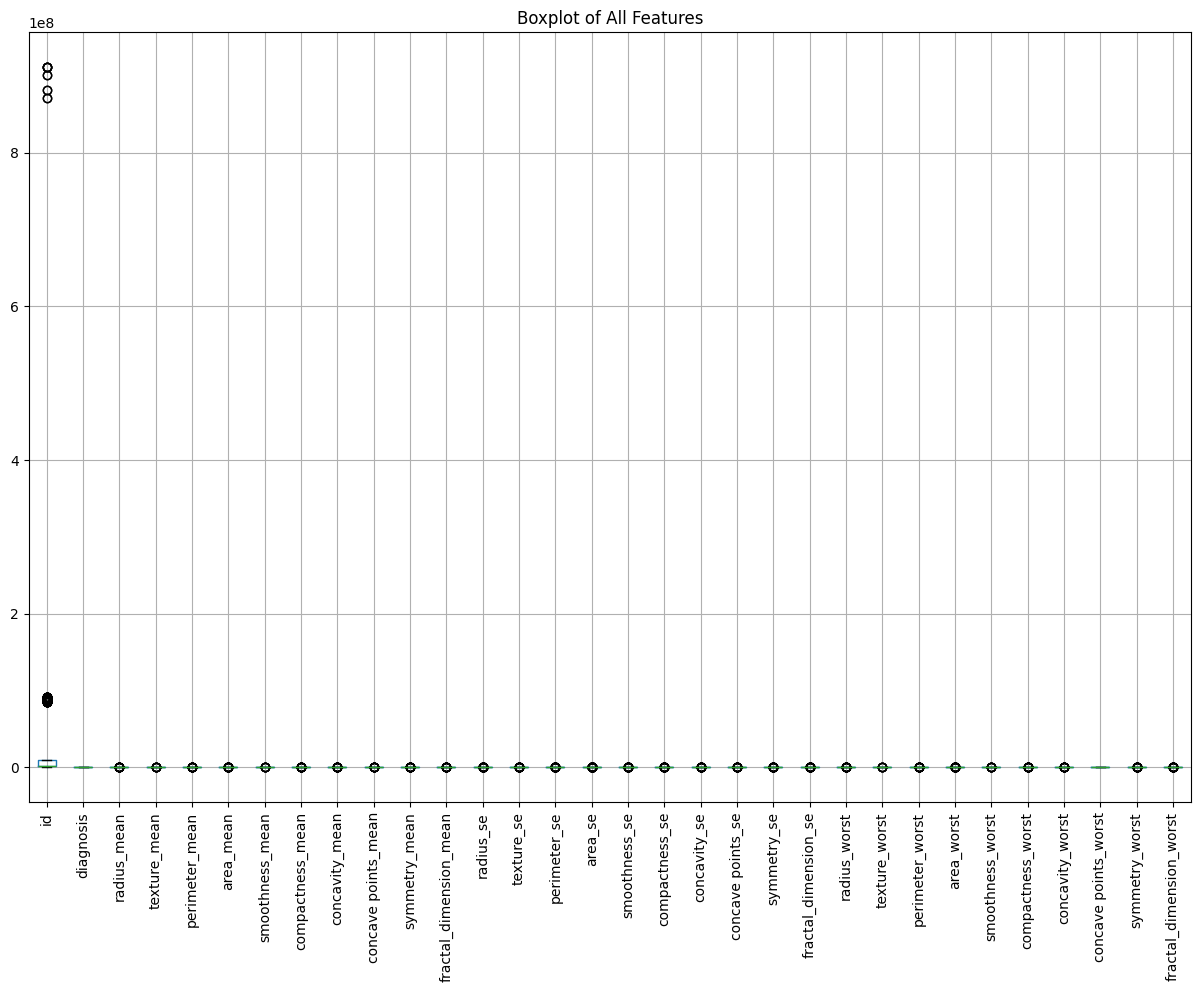

In [15]:
import seaborn as sns

plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title("Boxplot of All Features")
plt.show()

In [16]:
df = df.drop('id', axis=1)

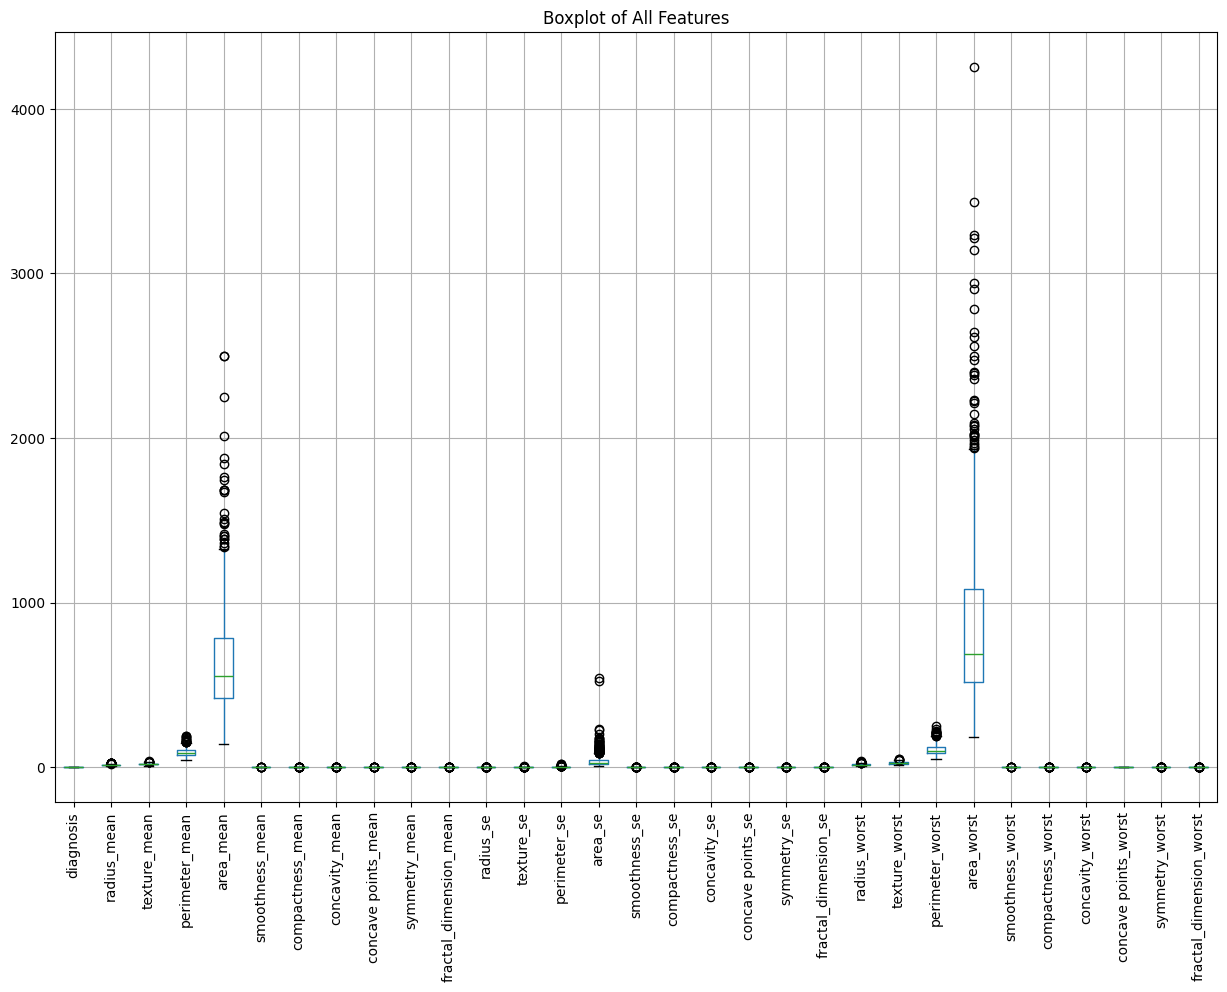

In [17]:
import seaborn as sns

plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title("Boxplot of All Features")
plt.show()

In [18]:
import numpy as np

outlier_counts = {}

for col in df.columns:
    if df[col].dtype != "object":   # avoid diagnosis column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_counts[col] = len(outliers)

# Show results sorted
outlier_counts

{'diagnosis': 0,
 'radius_mean': 14,
 'texture_mean': 7,
 'perimeter_mean': 13,
 'area_mean': 25,
 'smoothness_mean': 6,
 'compactness_mean': 16,
 'concavity_mean': 18,
 'concave points_mean': 10,
 'symmetry_mean': 15,
 'fractal_dimension_mean': 15,
 'radius_se': 38,
 'texture_se': 20,
 'perimeter_se': 38,
 'area_se': 65,
 'smoothness_se': 30,
 'compactness_se': 28,
 'concavity_se': 22,
 'concave points_se': 19,
 'symmetry_se': 27,
 'fractal_dimension_se': 28,
 'radius_worst': 17,
 'texture_worst': 5,
 'perimeter_worst': 15,
 'area_worst': 35,
 'smoothness_worst': 7,
 'compactness_worst': 16,
 'concavity_worst': 12,
 'concave points_worst': 0,
 'symmetry_worst': 23,
 'fractal_dimension_worst': 24}

In [19]:
{k: v for k, v in outlier_counts.items() if v > 0}

{'radius_mean': 14,
 'texture_mean': 7,
 'perimeter_mean': 13,
 'area_mean': 25,
 'smoothness_mean': 6,
 'compactness_mean': 16,
 'concavity_mean': 18,
 'concave points_mean': 10,
 'symmetry_mean': 15,
 'fractal_dimension_mean': 15,
 'radius_se': 38,
 'texture_se': 20,
 'perimeter_se': 38,
 'area_se': 65,
 'smoothness_se': 30,
 'compactness_se': 28,
 'concavity_se': 22,
 'concave points_se': 19,
 'symmetry_se': 27,
 'fractal_dimension_se': 28,
 'radius_worst': 17,
 'texture_worst': 5,
 'perimeter_worst': 15,
 'area_worst': 35,
 'smoothness_worst': 7,
 'compactness_worst': 16,
 'concavity_worst': 12,
 'symmetry_worst': 23,
 'fractal_dimension_worst': 24}

In [20]:
from scipy.stats import zscore

z_scores = pd.DataFrame(zscore(df.select_dtypes(include=['float64','int64'])))
df_clean = df[(abs(z_scores) < 3).all(axis=1)]
print(df_clean.shape)

(495, 31)


In [21]:
# X = all columns except diagnosis
X = df.drop('diagnosis', axis=1)

# y = diagnosis column
y = df['diagnosis']

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



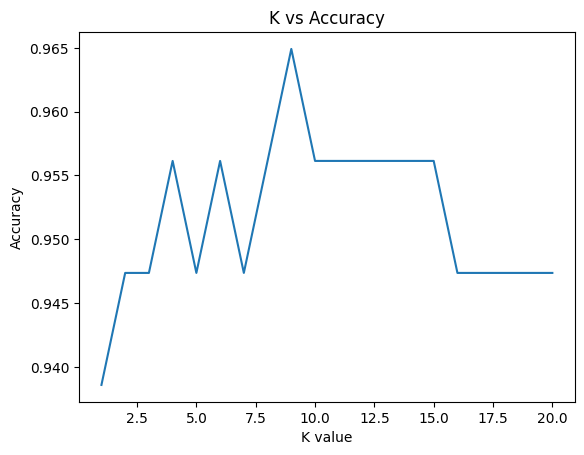

In [27]:
import matplotlib.pyplot as plt

accuracies = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(range(1, 21), accuracies)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

In [28]:
best_k = 9   # or try 8
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

y_pred_final = knn_final.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))

Final Accuracy: 0.9649122807017544
Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

